In [1]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
'''info'''
#Recall that the most optimal series found yet was 
#series = 600/(1.88686*ii+1)
#with an overshot of 0.004491383366257651 km using 6 stops.

#series = 600/(2.054*ii+1)
#Base was reached with an overshot of 0.09309210393803369 km using 7 stops. - This one works 
#The rover made it! The configuration works. The rover made it to the base with 0.15789206767922348 of fuel left over.
#THIS ONE DOESN'T WORK BECAUSE THE ROVER PICKS UP TOO MUCH FUEL. LOOK AT FIXING? 

#REMEMBER TO ADD A SECTION THAT TRACKS THE TOTAL AMOUNT OF FUEL USED.
#DOES NOT SEEM TO WORK FOR THE MORE 'EFFICIENT' SERIES. THINK ABOUT WHY THAT MAY BE.

#Build an expression/graph that looks at how close different harmonic series come to reaching 2. Newton-Rhapson? Graphical?

#Is the minimum number of stops 7?

#Harmonic numbers

#Keep the same series no matter how long we make the total journey because we always want the last leg to be around 600km. 

'info'

In [3]:
'''Testing different series to see which one converges the best'''
stops = 0
summ = 0
goal = 1200

for ii in range(0,10000):
  series = 600/(2*ii+1)
  summ += series
  stops = ii
  print(series)
  if summ >= goal:
    print('Base was reached with an overshot of', summ-goal, 'km using', stops, 'stops.')
    break 

600.0
200.0
120.0
85.71428571428571
66.66666666666667
54.54545454545455
46.15384615384615
40.0
Base was reached with an overshot of 13.080253080252987 km using 7 stops.


In [4]:
'''Start converting the problem into code. Begin by intialising values to be used later'''
total_distance = 2 #Have it as 2 for the moment to measure everything in 'tank lots' of the landrover
fuel_used = 0 #Keep track of the total amount of fuel used§
tank_level = 1 #to keep track of the fuel in the tank at any moment
lower_tank_threshold = -5e-15 #The lowest we will allow the tank level to reach while still allowing for the effects of numerical estimation.

#2d array to contain information about the stops. 
#column one details the distance the outpost is at from the origin(constant) 
#while column two details displacement of the outpost from the previous outpost
#and column three details the fuel deposit at the outpost
stop_info = np.zeros((int(stops), 3))
summ=0

for ii in range(stops, 0, -1):
  series = 1/(2*ii+1)
  stop_info[ii-1,1]=series
  summ += series
  stop_info[ii-1,0] = summ

#Reversing the order of the array 
stop_info=stop_info[::-1]




'''Begin simulation of the actual journey using the series'''
#Include an if statement within the for loop that will immediately catch if the tank of the rover falls below 0
failed_statement='This configuration does not work. The tank has reached negative fuel and the rover is stranded.'

#Introduce a nested for set of for loops. One that will deal with the establishment of new outposts, and the other that will reflect the fuel used from previously 
#established ones to get to the new outpost 
for current_stop in range(0,stops):
  print('Establishing stop', current_stop)
  
  for ii in range(0, current_stop):
    #Forwards direction
    tank_level=tank_level-stop_info[ii,1] #Displacement only from the last stop, not the total distance from the origin.
    if tank_level<lower_tank_threshold:
      print(failed_statement, stop_info)
      break 
    stop_info[ii,2]=stop_info[ii,2]-stop_info[ii,1] #Removing fuel from each passed stop to account for the pickup of fuel to travel forward
    tank_level=tank_level + stop_info[ii,1] #Gaining the fuel from the stop
    #Don't include a fuel used statement here as we will have already accounted for it in the establishment of the stop
    if tank_level<lower_tank_threshold:
      print(failed_statement, stop_info)
      break 
  
  #Travelling past established stops and setting up new stop
  tank_level=tank_level - stop_info[current_stop,1] #forwards journey only
  fuel_used+=2*stop_info[current_stop,1] #Account for fuel in forwards and backwards travel as they are the same
  if tank_level<lower_tank_threshold:
    print(failed_statement, stop_info)
    break 
  stop_info[current_stop, 2] = tank_level - stop_info[current_stop,1] #Depositing fuel while leaving enough to reach the next stop
  tank_level = tank_level - stop_info[current_stop, 2] #Reflecting the fuel lost to establish the outpost 
  fuel_used+=stop_info[current_stop,2] #Keeping track of the fuel used to set up the outpost
  #This is the only fuel usage that we need account for, as all other fuel usage will be restored via the stops
  if tank_level<lower_tank_threshold:
    print(failed_statement, stop_info)
    break 

  for jj in range(current_stop, 0, -1): 
    #Backwards direction
    tank_level=tank_level-stop_info[jj,1] #Removing fuel to reach the next outpost
    if tank_level<lower_tank_threshold:
      print(failed_statement, stop_info)
      break 
    stop_info[jj-1, 2] = stop_info[jj-1,2]-stop_info[jj-1,1] #Removing one unit of fuel from the outpost to refuel the tank
    tank_level = tank_level+stop_info[jj-1,1]
    if tank_level<lower_tank_threshold:
      print(failed_statement, stop_info)
      break 

  #account for the last stop
  tank_level=tank_level-stop_info[0,0] 
  if tank_level<lower_tank_threshold:
    print(failed_statement, stop_info)
    break 

  #Refuel at reaching the landing zone
  print('Reached LZ with a tank of', tank_level)
  tank_level=1
  print(stop_info)
  #Info about the fuel used
  print('\n Fuel used so far is', fuel_used, 'in setting up', current_stop+1, 'stops. We expect it to be', current_stop+1)


print('Prepared for final journey.')




'''Now include a section that actually carries out the final journey to ensure the series used has been viable'''
print('\n \n \n Beginning the final journey. Fuel is at', tank_level)
for final_journey in range(0, stops):
    tank_level=tank_level - stop_info[final_journey,1]
    print('\n Reached outpost', final_journey, 'with', tank_level, 'of fuel.')
    tank_level = tank_level + stop_info[final_journey,2]
    stop_info[final_journey,2] = 0
    print('The stops are at \n', stop_info)

final_leg = 2-stop_info[-1,0] #The distance after the final stop
print('\n The journey left is', final_leg , 'and the rover has', tank_level, 'of fuel')
tank_level=tank_level - final_leg #Taking the fuel away to reach the final base
fuel_used+=final_leg #Fuel to travel final distance with no refuel 
if tank_level<lower_tank_threshold:
    print('The rover did not make it to the base. The configuration does not work. The fuel was', -1*tank_level, 'too little.')
else:
    print('The rover made it! The configuration works. The rover made it to the base with', tank_level, 'of fuel left over. It used', fuel_used, 'of fuel in total.')

Establishing stop 0
Reached LZ with a tank of -1.3877787807814457e-17
[[0.06666667 0.06666667 0.86666667]
 [0.14358974 0.07692308 0.        ]
 [0.23449883 0.09090909 0.        ]
 [0.34560995 0.11111111 0.        ]
 [0.48846709 0.14285714 0.        ]
 [0.68846709 0.2        0.        ]
 [1.02180042 0.33333333 0.        ]]

 Fuel used so far is 1.0 in setting up 1 stops. We expect it to be 1
Establishing stop 1
Reached LZ with a tank of -5.551115123125783e-17
[[0.06666667 0.06666667 0.73333333]
 [0.14358974 0.07692308 0.84615385]
 [0.23449883 0.09090909 0.        ]
 [0.34560995 0.11111111 0.        ]
 [0.48846709 0.14285714 0.        ]
 [0.68846709 0.2        0.        ]
 [1.02180042 0.33333333 0.        ]]

 Fuel used so far is 2.0 in setting up 2 stops. We expect it to be 2
Establishing stop 2
Reached LZ with a tank of 2.7755575615628914e-17
[[0.06666667 0.06666667 0.6       ]
 [0.14358974 0.07692308 0.69230769]
 [0.23449883 0.09090909 0.81818182]
 [0.34560995 0.11111111 0.        ]
 [

In [7]:
'''Pass a large for loop over varying distances to see how it affects the total number of stops needed and hence the fuel used.'''
distances=np.arange(1, 6, 0.001)
stops_needed_odd=np.zeros(len(distances))
wastage=np.zeros(len(distances))
rover_capacity=1

for current_stop in range(0,len(distances)):
    print('On iteration', current_stop, 'of', len(distances)) #Keep track during execution
    #Include the series loop
    summ=0
    for ii in range(0,1000000):
        series=rover_capacity/(2*ii+1)
        summ += series
        stops = ii
        if summ >= distances[current_stop]:
            break 
        stops_needed_odd[current_stop]=stops
    
    #Want to now also include a section that looks at the wastage of the fuel
    wastage[current_stop] = summ - distances[current_stop]

print(stops_needed_odd)

On iteration 0 of 5000
On iteration 1 of 5000
On iteration 2 of 5000
On iteration 3 of 5000
On iteration 4 of 5000
On iteration 5 of 5000
On iteration 6 of 5000
On iteration 7 of 5000
On iteration 8 of 5000
On iteration 9 of 5000
On iteration 10 of 5000
On iteration 11 of 5000
On iteration 12 of 5000
On iteration 13 of 5000
On iteration 14 of 5000
On iteration 15 of 5000
On iteration 16 of 5000
On iteration 17 of 5000
On iteration 18 of 5000
On iteration 19 of 5000
On iteration 20 of 5000
On iteration 21 of 5000
On iteration 22 of 5000
On iteration 23 of 5000
On iteration 24 of 5000
On iteration 25 of 5000
On iteration 26 of 5000
On iteration 27 of 5000
On iteration 28 of 5000
On iteration 29 of 5000
On iteration 30 of 5000
On iteration 31 of 5000
On iteration 32 of 5000
On iteration 33 of 5000
On iteration 34 of 5000
On iteration 35 of 5000
On iteration 36 of 5000
On iteration 37 of 5000
On iteration 38 of 5000
On iteration 39 of 5000
On iteration 40 of 5000
On iteration 41 of 5000
On

On iteration 814 of 5000
On iteration 815 of 5000
On iteration 816 of 5000
On iteration 817 of 5000
On iteration 818 of 5000
On iteration 819 of 5000
On iteration 820 of 5000
On iteration 821 of 5000
On iteration 822 of 5000
On iteration 823 of 5000
On iteration 824 of 5000
On iteration 825 of 5000
On iteration 826 of 5000
On iteration 827 of 5000
On iteration 828 of 5000
On iteration 829 of 5000
On iteration 830 of 5000
On iteration 831 of 5000
On iteration 832 of 5000
On iteration 833 of 5000
On iteration 834 of 5000
On iteration 835 of 5000
On iteration 836 of 5000
On iteration 837 of 5000
On iteration 838 of 5000
On iteration 839 of 5000
On iteration 840 of 5000
On iteration 841 of 5000
On iteration 842 of 5000
On iteration 843 of 5000
On iteration 844 of 5000
On iteration 845 of 5000
On iteration 846 of 5000
On iteration 847 of 5000
On iteration 848 of 5000
On iteration 849 of 5000
On iteration 850 of 5000
On iteration 851 of 5000
On iteration 852 of 5000
On iteration 853 of 5000


On iteration 1688 of 5000
On iteration 1689 of 5000
On iteration 1690 of 5000
On iteration 1691 of 5000
On iteration 1692 of 5000
On iteration 1693 of 5000
On iteration 1694 of 5000
On iteration 1695 of 5000
On iteration 1696 of 5000
On iteration 1697 of 5000
On iteration 1698 of 5000
On iteration 1699 of 5000
On iteration 1700 of 5000
On iteration 1701 of 5000
On iteration 1702 of 5000
On iteration 1703 of 5000
On iteration 1704 of 5000
On iteration 1705 of 5000
On iteration 1706 of 5000
On iteration 1707 of 5000
On iteration 1708 of 5000
On iteration 1709 of 5000
On iteration 1710 of 5000
On iteration 1711 of 5000
On iteration 1712 of 5000
On iteration 1713 of 5000
On iteration 1714 of 5000
On iteration 1715 of 5000
On iteration 1716 of 5000
On iteration 1717 of 5000
On iteration 1718 of 5000
On iteration 1719 of 5000
On iteration 1720 of 5000
On iteration 1721 of 5000
On iteration 1722 of 5000
On iteration 1723 of 5000
On iteration 1724 of 5000
On iteration 1725 of 5000
On iteration

On iteration 2563 of 5000
On iteration 2564 of 5000
On iteration 2565 of 5000
On iteration 2566 of 5000
On iteration 2567 of 5000
On iteration 2568 of 5000
On iteration 2569 of 5000
On iteration 2570 of 5000
On iteration 2571 of 5000
On iteration 2572 of 5000
On iteration 2573 of 5000
On iteration 2574 of 5000
On iteration 2575 of 5000
On iteration 2576 of 5000
On iteration 2577 of 5000
On iteration 2578 of 5000
On iteration 2579 of 5000
On iteration 2580 of 5000
On iteration 2581 of 5000
On iteration 2582 of 5000
On iteration 2583 of 5000
On iteration 2584 of 5000
On iteration 2585 of 5000
On iteration 2586 of 5000
On iteration 2587 of 5000
On iteration 2588 of 5000
On iteration 2589 of 5000
On iteration 2590 of 5000
On iteration 2591 of 5000
On iteration 2592 of 5000
On iteration 2593 of 5000
On iteration 2594 of 5000
On iteration 2595 of 5000
On iteration 2596 of 5000
On iteration 2597 of 5000
On iteration 2598 of 5000
On iteration 2599 of 5000
On iteration 2600 of 5000
On iteration

On iteration 3143 of 5000
On iteration 3144 of 5000
On iteration 3145 of 5000
On iteration 3146 of 5000
On iteration 3147 of 5000
On iteration 3148 of 5000
On iteration 3149 of 5000
On iteration 3150 of 5000
On iteration 3151 of 5000
On iteration 3152 of 5000
On iteration 3153 of 5000
On iteration 3154 of 5000
On iteration 3155 of 5000
On iteration 3156 of 5000
On iteration 3157 of 5000
On iteration 3158 of 5000
On iteration 3159 of 5000
On iteration 3160 of 5000
On iteration 3161 of 5000
On iteration 3162 of 5000
On iteration 3163 of 5000
On iteration 3164 of 5000
On iteration 3165 of 5000
On iteration 3166 of 5000
On iteration 3167 of 5000
On iteration 3168 of 5000
On iteration 3169 of 5000
On iteration 3170 of 5000
On iteration 3171 of 5000
On iteration 3172 of 5000
On iteration 3173 of 5000
On iteration 3174 of 5000
On iteration 3175 of 5000
On iteration 3176 of 5000
On iteration 3177 of 5000
On iteration 3178 of 5000
On iteration 3179 of 5000
On iteration 3180 of 5000
On iteration

On iteration 3507 of 5000
On iteration 3508 of 5000
On iteration 3509 of 5000
On iteration 3510 of 5000
On iteration 3511 of 5000
On iteration 3512 of 5000
On iteration 3513 of 5000
On iteration 3514 of 5000
On iteration 3515 of 5000
On iteration 3516 of 5000
On iteration 3517 of 5000
On iteration 3518 of 5000
On iteration 3519 of 5000
On iteration 3520 of 5000
On iteration 3521 of 5000
On iteration 3522 of 5000
On iteration 3523 of 5000
On iteration 3524 of 5000
On iteration 3525 of 5000
On iteration 3526 of 5000
On iteration 3527 of 5000
On iteration 3528 of 5000
On iteration 3529 of 5000
On iteration 3530 of 5000
On iteration 3531 of 5000
On iteration 3532 of 5000
On iteration 3533 of 5000
On iteration 3534 of 5000
On iteration 3535 of 5000
On iteration 3536 of 5000
On iteration 3537 of 5000
On iteration 3538 of 5000
On iteration 3539 of 5000
On iteration 3540 of 5000
On iteration 3541 of 5000
On iteration 3542 of 5000
On iteration 3543 of 5000
On iteration 3544 of 5000
On iteration

On iteration 3946 of 5000
On iteration 3947 of 5000
On iteration 3948 of 5000
On iteration 3949 of 5000
On iteration 3950 of 5000
On iteration 3951 of 5000
On iteration 3952 of 5000
On iteration 3953 of 5000
On iteration 3954 of 5000
On iteration 3955 of 5000
On iteration 3956 of 5000
On iteration 3957 of 5000
On iteration 3958 of 5000
On iteration 3959 of 5000
On iteration 3960 of 5000
On iteration 3961 of 5000
On iteration 3962 of 5000
On iteration 3963 of 5000
On iteration 3964 of 5000
On iteration 3965 of 5000
On iteration 3966 of 5000
On iteration 3967 of 5000
On iteration 3968 of 5000
On iteration 3969 of 5000
On iteration 3970 of 5000
On iteration 3971 of 5000
On iteration 3972 of 5000
On iteration 3973 of 5000
On iteration 3974 of 5000
On iteration 3975 of 5000
On iteration 3976 of 5000
On iteration 3977 of 5000
On iteration 3978 of 5000
On iteration 3979 of 5000
On iteration 3980 of 5000
On iteration 3981 of 5000
On iteration 3982 of 5000
On iteration 3983 of 5000
On iteration

On iteration 4296 of 5000
On iteration 4297 of 5000
On iteration 4298 of 5000
On iteration 4299 of 5000
On iteration 4300 of 5000
On iteration 4301 of 5000
On iteration 4302 of 5000
On iteration 4303 of 5000
On iteration 4304 of 5000
On iteration 4305 of 5000
On iteration 4306 of 5000
On iteration 4307 of 5000
On iteration 4308 of 5000
On iteration 4309 of 5000
On iteration 4310 of 5000
On iteration 4311 of 5000
On iteration 4312 of 5000
On iteration 4313 of 5000
On iteration 4314 of 5000
On iteration 4315 of 5000
On iteration 4316 of 5000
On iteration 4317 of 5000
On iteration 4318 of 5000
On iteration 4319 of 5000
On iteration 4320 of 5000
On iteration 4321 of 5000
On iteration 4322 of 5000
On iteration 4323 of 5000
On iteration 4324 of 5000
On iteration 4325 of 5000
On iteration 4326 of 5000
On iteration 4327 of 5000
On iteration 4328 of 5000
On iteration 4329 of 5000
On iteration 4330 of 5000
On iteration 4331 of 5000
On iteration 4332 of 5000
On iteration 4333 of 5000
On iteration

On iteration 4614 of 5000
On iteration 4615 of 5000
On iteration 4616 of 5000
On iteration 4617 of 5000
On iteration 4618 of 5000
On iteration 4619 of 5000
On iteration 4620 of 5000
On iteration 4621 of 5000
On iteration 4622 of 5000
On iteration 4623 of 5000
On iteration 4624 of 5000
On iteration 4625 of 5000
On iteration 4626 of 5000
On iteration 4627 of 5000
On iteration 4628 of 5000
On iteration 4629 of 5000
On iteration 4630 of 5000
On iteration 4631 of 5000
On iteration 4632 of 5000
On iteration 4633 of 5000
On iteration 4634 of 5000
On iteration 4635 of 5000
On iteration 4636 of 5000
On iteration 4637 of 5000
On iteration 4638 of 5000
On iteration 4639 of 5000
On iteration 4640 of 5000
On iteration 4641 of 5000
On iteration 4642 of 5000
On iteration 4643 of 5000
On iteration 4644 of 5000
On iteration 4645 of 5000
On iteration 4646 of 5000
On iteration 4647 of 5000
On iteration 4648 of 5000
On iteration 4649 of 5000
On iteration 4650 of 5000
On iteration 4651 of 5000
On iteration

On iteration 4938 of 5000
On iteration 4939 of 5000
On iteration 4940 of 5000
On iteration 4941 of 5000
On iteration 4942 of 5000
On iteration 4943 of 5000
On iteration 4944 of 5000
On iteration 4945 of 5000
On iteration 4946 of 5000
On iteration 4947 of 5000
On iteration 4948 of 5000
On iteration 4949 of 5000
On iteration 4950 of 5000
On iteration 4951 of 5000
On iteration 4952 of 5000
On iteration 4953 of 5000
On iteration 4954 of 5000
On iteration 4955 of 5000
On iteration 4956 of 5000
On iteration 4957 of 5000
On iteration 4958 of 5000
On iteration 4959 of 5000
On iteration 4960 of 5000
On iteration 4961 of 5000
On iteration 4962 of 5000
On iteration 4963 of 5000
On iteration 4964 of 5000
On iteration 4965 of 5000
On iteration 4966 of 5000
On iteration 4967 of 5000
On iteration 4968 of 5000
On iteration 4969 of 5000
On iteration 4970 of 5000
On iteration 4971 of 5000
On iteration 4972 of 5000
On iteration 4973 of 5000
On iteration 4974 of 5000
On iteration 4975 of 5000
On iteration

<IPython.core.display.Javascript object>


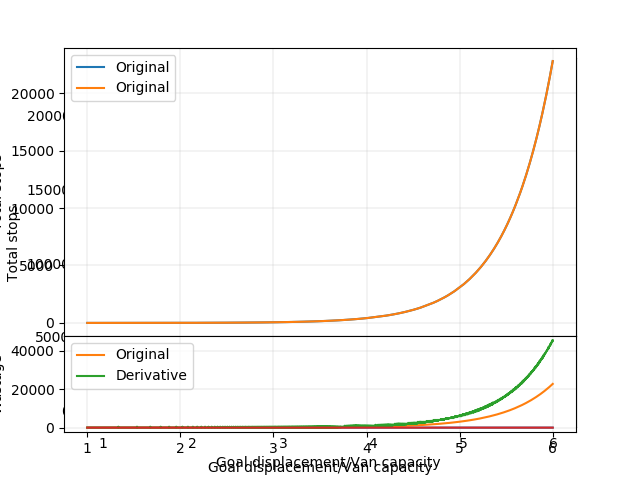

In [6]:
plt.plot(distances, wastage)

In [9]:
'''Find the numerical derivative and show that it matches the y value to prove an exponential relationship.'''
def numerical_first_derivative(u_vector,dx):
    v=np.zeros(len(u_vector))
    for ii in np.arange(1,len(u_vector) - 1):
        v[ii]=(u_vector[ii+1]-u_vector[ii-1])/(2*dx)
    v[0]=v[1]
    v[len(v)-1]=v[len(v)-2]
    return v

#Store the derivative values
dx=distances[1]-distances[0]
derv=numerical_first_derivative(stops_needed_odd, dx)

#ratio of y'/y 
ratio_y = derv/stops_needed_odd
print(ratio_y)

[       nan        nan        nan ... 1.98176774 1.99982419 1.9957891 ]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [8]:
'''Now plot the results'''
plt.plot(distances, stops_needed_odd, label='Original')
plt.xlabel('Goal displacement/Van capacity')
plt.ylabel('Total stops')
plt.legend()

<IPython.core.display.Javascript object>


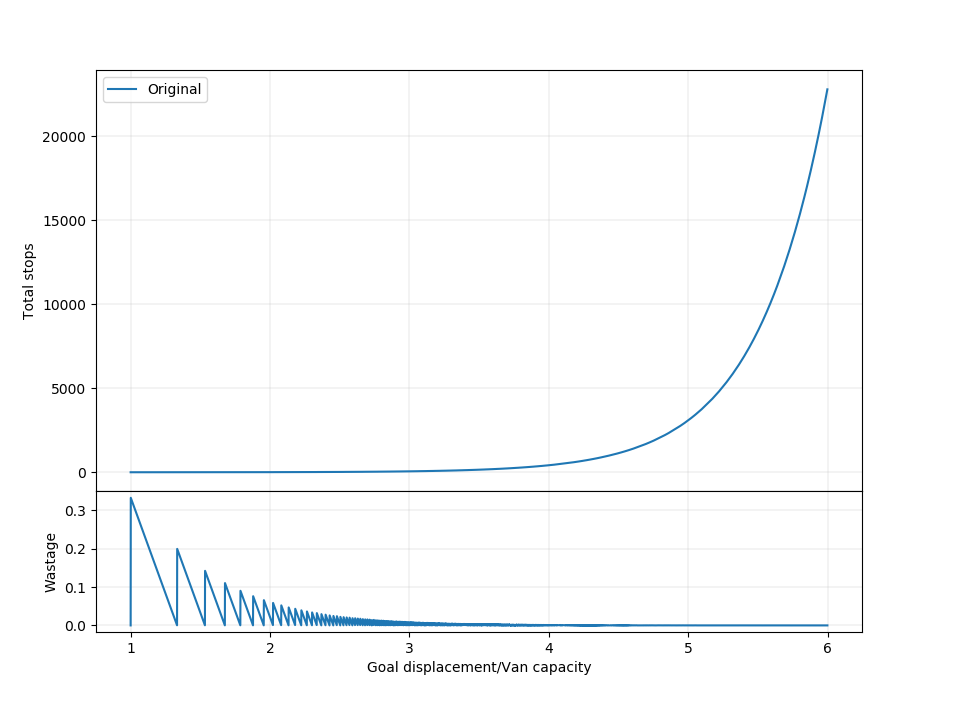

In [12]:
#Main plot
fig1=plt.figure(1)
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(distances, stops_needed_odd, label='Original')
plt.ylabel('Total stops')
plt.legend()
frame1.set_xticklabels([])
plt.grid(linewidth=0.2)

#Residual plot of wastage
frame2=fig1.add_axes((.1,.1,.8,.2))
plt.plot(distances, wastage)
plt.ylabel('Wastage')
plt.grid(linewidth=0.2)
plt.xlabel('Goal displacement/Van capacity')

fig1.show()

<IPython.core.display.Javascript object>


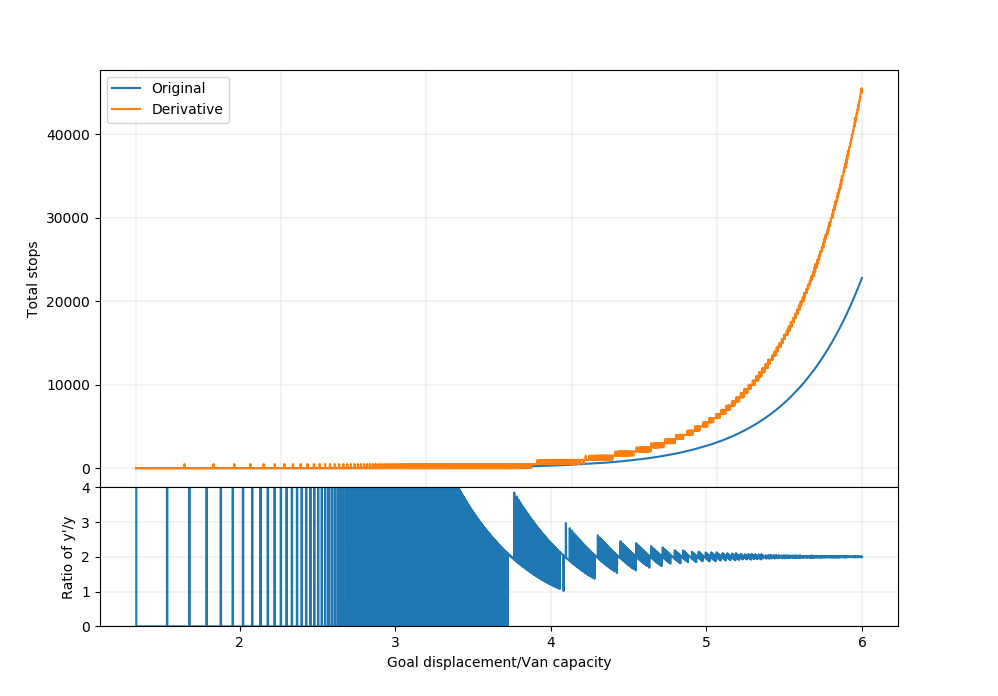

In [11]:
'''Now plot the results with derivative'''
#Derivative plot
fig1=plt.figure(1)
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(distances, stops_needed_odd, label='Original')
plt.plot(distances, derv, label='Derivative')
plt.ylabel('Total stops')
plt.legend()
frame1.set_xticklabels([])
plt.grid(linewidth=0.2)

#Residual plot of wastage
frame2=fig1.add_axes((.1,.1,.8,.2))
plt.plot(distances, ratio_y)
plt.ylabel('Ratio of y\'/y')
plt.grid(linewidth=0.2)
plt.xlabel('Goal displacement/Van capacity')
plt.ylim(0,4)

fig1.show()